### Step 1: Import Data with CoinPaprika API (https://api.coinpaprika.com/)

In [62]:
import Coinpaprika
import pandas as pd 
import numpy as np
from pytrends.request import TrendReq
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

#view all data and currency we get from the API

api_client = Coinpaprika.Client()
market_overview = api_client.global_market_overview()

print(market_overview)

all_coins = api_client.coins()
for i  in range(0, 10):
    print(all_coins[i]['id'])

{'market_cap_usd': 2326205413767, 'volume_24h_usd': 600476707792, 'bitcoin_dominance_percentage': 46.02, 'cryptocurrencies_number': 2429, 'market_cap_ath_value': 2328874747014, 'market_cap_ath_date': '2021-05-06T10:30:00Z', 'volume_24h_ath_value': 1388195572070, 'volume_24h_ath_date': '2021-05-02T17:00:00Z', 'volume_24h_percent_from_ath': -56.74, 'volume_24h_percent_to_ath': 131.18, 'market_cap_change_24h': 1.67, 'volume_24h_change_24h': 30.24, 'last_updated': 1620380597}
btc-bitcoin
eth-ethereum
bnb-binance-coin
doge-dogecoin
xrp-xrp
usdt-tether
ada-cardano
dot-polkadot
bch-bitcoin-cash
ltc-litecoin


## get historical data 

In [63]:
#view historical data from the cryptocurrency (=Bitcoin) we want to predict.

coin = 'btc-bitcoin'
color = 'green'

hist = api_client.coins.historical_OHLC(
    coin_id=coin,
    start=datetime.now() - timedelta(weeks=4),
    end=datetime.now()
)
# TODO: "clean up" data (na's, outliers, etc.)

In [64]:
#Cleansing Serie:

ser = pd.Series(hist)

# Print the whole dataset including missing values:
print(ser.isnull())

# Print a separation row:
print()

# Show only missing values:
print(ser[ser.isnull()])

#no missing data 

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
dtype: bool

Series([], dtype: object)


In [65]:
# find duplicates -> only check the dates 

duplicate = pd.Series('time_open')
duplicate.duplicated(keep = False) # keep = False -> mark every duplicate as True
# no duplicates

0    False
dtype: bool

In [66]:
# time series to dataframe
df_hist = pd.DataFrame(hist)
df_hist.head()

,time_open,time_close,open,high,low,close,volume,market_cap
0,2021-04-09,2021-04-09 23:59:59,58116.59,58888.96,57815.55,58201.91,42382612463,1085463837507
1,2021-04-10,2021-04-10 23:59:59,58185.88,61130.30,58008.92,59828.46,58820424143,1086812183906
2,2021-04-11,2021-04-11 23:59:59,59800.38,60679.08,59391.38,60056.73,45516101874,1117027820501
3,2021-04-12,2021-04-12 23:59:59,60101.74,61403.57,59756.36,59978.89,49986299659,1122710684729
4,2021-04-13,2021-04-13 23:59:59,59933.20,63818.41,59926.01,63608.18,65659269642,1119616997346


/Users/laurafromm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


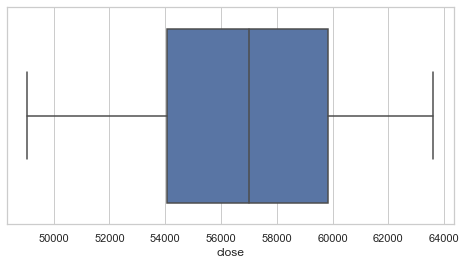

In [72]:
# detect outliers  (https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/)
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.boxplot(df_hist['close'])
sns.set(rc={'figure.figsize':(8,4)})
# show points
#ax = sns.boxplot(x="close", data=hist)
#ax = sns.swarmplot(x="close", data=hist, color=".25")

#no outliers

In [73]:
pd.options.display.float_format = '{:.2f}'.format
df = pd.DataFrame(df_hist)
df.describe()

,open,high,low,close,volume,market_cap
count,29.00,29.00,29.00,29.00,29.00,29.00
mean,57003.26,58385.50,55451.65,56985.11,59775143771.14,1065333448334.38
std,3915.47,3798.31,4127.90,3894.33,15003217403.51,72982327599.38
min,49129.49,50614.17,47618.30,49064.52,38143757385.00,918301141527.00
25%,54100.92,56287.30,53499.70,54066.09,46839526029.00,1011262548242.00
50%,56902.94,58090.48,55553.51,57000.38,58820424143.00,1063316095588.00
75%,59800.38,61130.30,58008.92,59828.46,68021451153.00,1117027820501.00
max,63675.35,65028.97,62214.97,63608.18,99540576213.00,1189580462018.00


<AxesSubplot:>

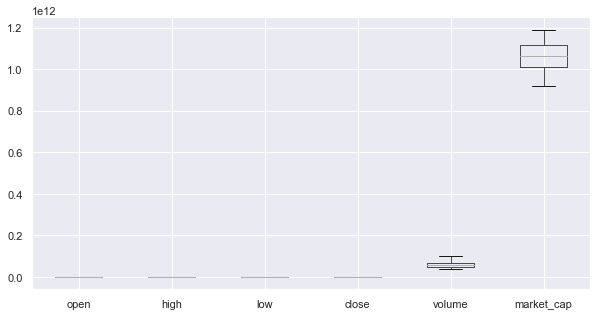

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
df.boxplot(ax=axes)

In [75]:
# drop volume & market_cap --> open, high, low und close besser sehen
df.drop(columns=['volume', 'market_cap'])

,time_open,time_close,open,high,low,close
0,2021-04-09,2021-04-09 23:59:59,58116.59,58888.96,57815.55,58201.91
1,2021-04-10,2021-04-10 23:59:59,58185.88,61130.30,58008.92,59828.46
2,2021-04-11,2021-04-11 23:59:59,59800.38,60679.08,59391.38,60056.73
3,2021-04-12,2021-04-12 23:59:59,60101.74,61403.57,59756.36,59978.89
4,2021-04-13,2021-04-13 23:59:59,59933.20,63818.41,59926.01,63608.18
5,2021-04-14,2021-04-14 23:59:59,63675.35,65028.97,61806.60,62866.96
6,2021-04-15,2021-04-15 23:59:59,63099.63,63917.18,62214.97,63448.50
7,2021-04-16,2021-04-16 23:59:59,63461.27,63940.01,61432.29,63031.57
8,2021-04-17,2021-04-17 23:59:59,63064.65,63839.32,61504.05,61852.38
9,2021-04-18,2021-04-18 23:59:59,61725.35,61992.34,54066.02,56595.13


<AxesSubplot:>

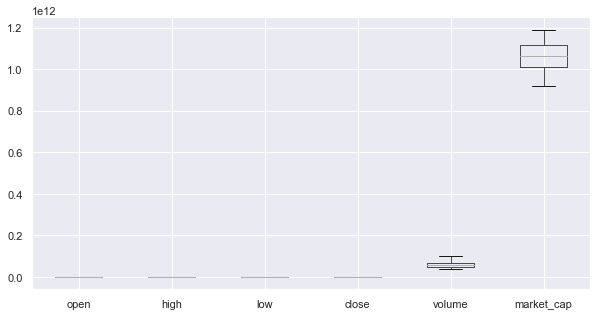

In [76]:
# ????
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
df.boxplot(ax=axes)

In [78]:
# Feature 1: Tägliche News (Einfluss auf Kurs) --> Durchschnitt der Anzahl an täglichen Suchen nach dem Wort Bitcoin
# Tägliche News der letzten 28 Tage
def getNewsAverage(today):
    
    pytrends = TrendReq()

    kw_list = ["Bitcoin"]

    # get timeframe of last 28 days
    #today = hist[0]['time_open']
    new_date = today - timedelta(days=28)
    toString = today.strftime("%Y-%m-%d")
    fromString = new_date.strftime("%Y-%m-%d")
    timespan = fromString + " " + toString

    pytrends.build_payload(kw_list, cat=0, timeframe=timespan, geo='', gprop='')
    df = pytrends.interest_over_time()

    # calculate average
    average = 0
    for i in range(0, len(df['Bitcoin'])):
        average += df['Bitcoin'][i]
    average /= len(df['Bitcoin'])

    return average

In [79]:
# alle Daten: 
    #0: pdctPositive,
    #1: PDCT predicted difference closing tomorrow,
    #2: closing,
    #3: variance,
    #4: time_open,
    #5: volume,
    #6: news

alldata = []
for i in range(0,len(hist)):
    variance = hist[i]['high'] - hist[i]['low']
    
    if(i == 0):
        pdct = 0
    else:
        pdct = hist[i]['close'] - hist[i-1]['close']
        
    pdctPositive = pdct > 0
    alldata.append({"pdctPositive": pdctPositive, "pdct": pdct, "close": hist[i]['close'], "variance": variance, "time_open": hist[i]['time_open'], "volume": hist[i]['volume'], "news": getNewsAverage(hist[i]['time_open'])})

In [38]:
hist[0]

{'time_open': datetime.datetime(2021, 4, 2, 0, 0),
 'time_close': datetime.datetime(2021, 4, 2, 23, 59, 59),
 'open': 58771.10234212,
 'high': 60086.03463254,
 'low': 58600.22488015,
 'close': 59035.72783202,
 'volume': 53148416451,
 'market_cap': 1097317485131}

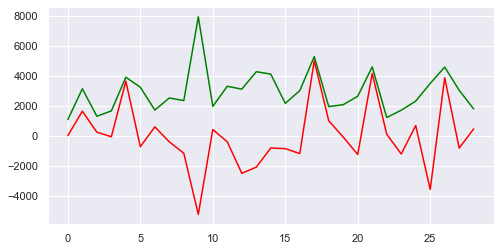

In [87]:
# Gegenüberstellung Variance(Differenz höchster Kurs zu tiefsten Kurs) mit PDCT(Differenz Closing gestern zu heute) in den letzten 28 Tagen
# WARUM?:
# TO DO: DATEN IM GRAPH ANZEIGEN LASSEN 
# RESULTAT: 
    # Wenn Variance und PDCT nah zusammenliegen, steigt der Kurs
graphdata = []
for i in range(0, len(alldata)):
    graphdata.append(alldata[i]['variance'])
pdct = []
for i in range(0, len(alldata)):
    pdct.append(alldata[i]['pdct'])

plt.plot(graphdata, "green")
plt.plot(pdct, "red")
plt.grid(True)
plt.show()

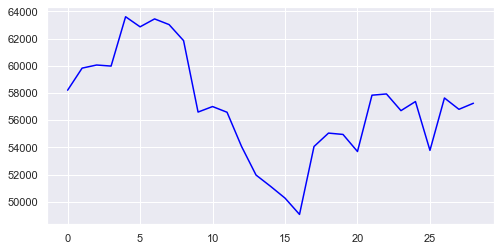

In [88]:
close = []
for i in range(0, len(alldata)):
    close.append(alldata[i]['close'])

plt.plot(close, "blue")
plt.grid(True)
plt.show()

In [128]:
#MA --> https://miltonfmr.com/python-how-i-used-simple-technical-analysis-to-improve-bitcoin-price-prediction/
#MA SW10 Semester 1 DSF !
# moving average der letzten 5 Tage
close = []
for i in range(0, 5):
    close.append(alldata[i]['close'])

window_size =1

i = 0
moving_averages = []
while i < len(close) - window_size + 1:
    this_window = close[i : i + window_size]

    window_average = sum(this_window) / window_size
    moving_averages.append(window_average)
    i += 1

print(moving_averages)

[58201.91217718, 59828.45657879, 60056.72572604, 59978.88776531, 63608.17519132]


In [129]:
# moving average der letzten 20 Tage
close = []
for i in range(0,20):
    close.append(alldata[i]['close'])

window_size =1

i = 0
moving_averages2 = []
while i < len(close) - window_size + 1:
    this_window = close[i : i + window_size]

    window_average = sum(this_window) / window_size
    moving_averages2.append(window_average)
    i += 1

print(moving_averages2)

[58201.91217718, 59828.45657879, 60056.72572604, 59978.88776531, 63608.17519132, 62866.96092455, 63448.50309793, 63031.56937431, 61852.37614616, 56595.12797689, 57000.38002992, 56581.48865398, 54066.09334042, 51961.16087988, 51133.5463416, 50264.17175558, 49064.5214996, 54059.77744163, 55047.31177054, 54948.96131554]


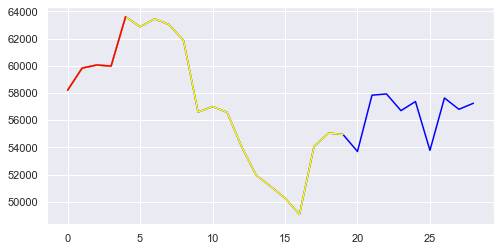

In [132]:
close = []
for i in range(0, len(alldata)):
    close.append(alldata[i]['close'])

plt.plot(close, "blue")
plt.plot(moving_averages2, "yellow")
plt.plot(moving_averages, "red")
plt.grid(True)
plt.show()

##

In [114]:
print(len(alldata))

29


## Ziel: Klassifikation: Ist der nächste Tick (Tag) höher oder tiefer als heute
> Klassifikationstree

### Daten:
- [x] Close heute
- [x] Varianz heute (high - low)
- [ ] Moving Average (letztes Jahr)
- [x] News Coverage (Google Trends) > pytrends

### Trainingsdatenset:
- von Paprikacoin API

In [145]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import cross_val_score

# CART
numberOfTestData = int(0.2 * len(alldata))

alldata = pd.DataFrame(alldata)

print(alldata.head(5))

#feature_cols = ['close', 'variance', 'volume', 'news']
feature_cols = ['close']

X = alldata[feature_cols]              # Features
y = alldata['close']            # Target variable

X_train = X[:-numberOfTestData]
X_test  = X[-numberOfTestData:]
y_train = y[:-numberOfTestData]
y_test  = y[-numberOfTestData:]

# Create Decision Tree classifer object
clf = DecisionTreeRegressor(max_depth=5)
#clf = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
#print("Accuracy:", metrics.accuracy_score(y_test, y_pred).round(4))
reg_metrics(y_test, y_pred, X_train)

   pdctPositive    pdct    close  variance  time_open       volume  news
0         False    0.00 58201.91   1073.41 2021-04-09  42382612463 70.90
1          True 1626.54 59828.46   3121.38 2021-04-10  58820424143 69.72
2          True  228.27 60056.73   1287.70 2021-04-11  45516101874 71.17
3         False  -77.84 59978.89   1647.22 2021-04-12  49986299659 79.55
4          True 3629.29 63608.18   3892.41 2021-04-13  65659269642 78.48
0.9664777565747046


In [139]:
def reg_metrics(y_test, y_pred, X_train):

    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    # Scikit-learn doesn't have adjusted r-square, hence custom code
    n = y_pred.shape[0]
    k = X_train.shape[1]
    adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)

    print(adj_r_sq)

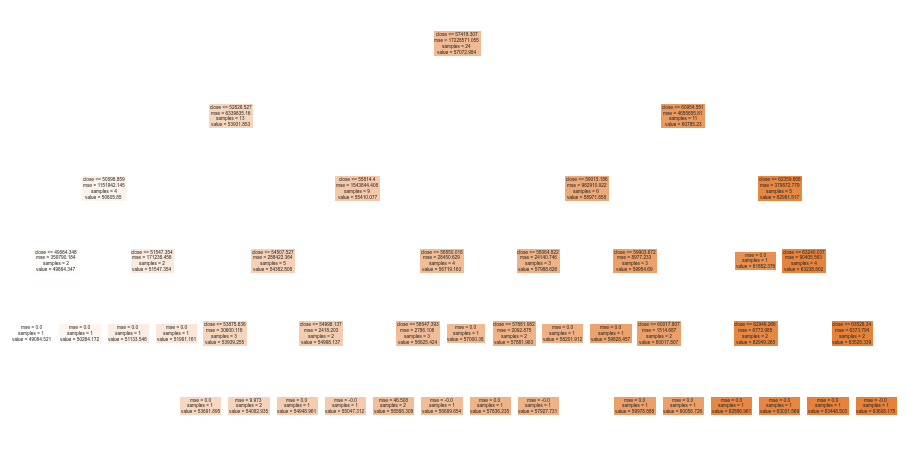

In [140]:
fig = plt.figure(figsize=(16,8))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names='news',
                   filled=True)

In [ ]:
#TO DO: Accuracy Score berechnen --> je nach resultat (>95%) weitere Schritte (prunning etc.)
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
import sklearn
from sklearn.model_selection import cross_val_score
#Get build in cross_validation metrics
#print(sorted(sklearn.metrics.SCORERS.keys()))

# Calculate metrics: one metric for each single model in the n-fold cross validation
scores = cross_val_score(clf, X_test, y_test, cv=5, scoring = 'accuracy')
print("Cross validation results:")
for i in scores:
    print(format(i, '.4f'))

print( format(scores.round(4), '.4f') )

# The mean score and the 95% confidence interval of the score estimate are given by:
print("Accuracy (mean of cross validation): %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))